In [1]:
import os
import time
import sys
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from concorde.tsp import TSPSolver
from math import sqrt

In [2]:
root_dir = os.getcwd()
tsp_dir = os.path.join(root_dir, "tsplib")
#concorde_dir = os.path.join(root_dir, "pyconcorde/concorde")

In [4]:
sys.path.insert(0, root_dir)
sys.path.insert(0, tsp_dir)
#sys.path.insert(0, concorde_dir)

In [5]:
num_samples = 10000

In [6]:
n_clusters = 30

In [7]:
def gen_tsp_data():
    tsp_database = {}
    cities = os.listdir(tsp_dir)
    
    for city in cities:
        if city.endswith(".tsp"):
            with open(tsp_dir + '/' + city, 'r') as infile:
                lines = infile.readlines()
                for i in range(0, len(lines)):
                    line = lines[i]
                    if "DIMENSION" in line:
                        Dimension = line.strip().split(':')[1]
                        if not Dimension.isdigit():
                            continue
                    if "EDGE_WEIGHT_TYPE" in line:
                        EdgeWeightType = line.strip().split()[1]
                        if EdgeWeightType != "EUC_2D":
                            continue
                    if "NODE_COORD_SECTION" in line:
                        x_y = None
                        nodelist_x = []
                        nodelist_y = []
        
                        for j in range (1, int(Dimension)):
                            x_y = lines[i+1].strip().split()[1:]
    #                        print(x_y)
    #                        import pdb; pdb.set_trace()
                            x = x_y[0]
                            y = x_y[1]
                            nodelist_x.append(float(x))
                            nodelist_y.append(float(y))
                            i+=1
                        tsp_database.update({city[:-4]:[nodelist_x, nodelist_y]})
    return tsp_database    

In [8]:
tsp_database = gen_tsp_data()
problem_list = tsp_database.keys()
problem_list

dict_keys(['ulysses22', 'u1060', 'gil262', 'd493', 'gr666', 'kroA100', 'u724', 'pr264', 'rd400', 'burma14', 'rl5934', 'nrw1379', 'pr152', 'pr144', 'fl1577', 'kroA200', 'rl11849', 'ts225', 'd2103', 'lin318', 'kroB100', 'fl1400', 'kroA150', 'gr229', 'tsp225', 'pr76', 'rl1889', 'fl3795', 'u159', 'rat783', 'rat99', 'eil51', 'u1817', 'pr107', 'pcb1173', 'fl417', 'pr136', 'st70', 'vm1748', 'pr299', 'pcb442', 'brd14051', 'u574', 'gr431', 'kroB150', 'gr202', 'vm1084', 'kroC100', 'kroE100', 'pr439', 'p654', 'd657', 'rl1323', 'berlin52', 'pr2392', 'bier127', 'pla7397', 'rl1304', 'a280', 'ali535', 'rat575', 'dsj1000', 'pr1002', 'pr124', 'd1655', 'u2319', 'd18512', 'u1432', 'gr137', 'pla33810', 'ch150', 'pla85900', 'd1291', 'eil101', 'pcb3038', 'lin105', 'rd100', 'ulysses16', 'linhp318', 'gr96', 'att532', 'eil76', 'd198', 'u2152', 'rat195', 'pr226', 'd15112', 'att48', 'kroD100', 'rl5915', 'ch130', 'usa13509', 'fnl4461', 'kroB200'])

Problem : rat575


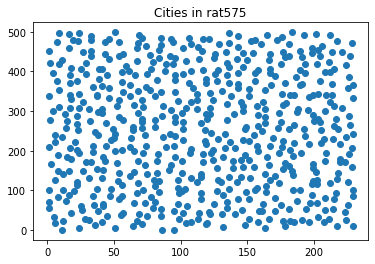

In [9]:
import pyproj as p
x = "rat575"
n_clusters = 500
coord_geo = False
if coord_geo == True:
     crs_wgs = p.Proj(init='epsg:4326')
     crs_bng = p.Proj(init = 'epsg:27700')
    
     tsp_database[x][0],tsp_database[x][1]  = p.transform(crs_wgs, crs_bng, tsp_database[x][1], tsp_database[x][0])
# for x in tsp_database:
print("Problem : " + x)
#    print(tsp_database[x])
X_coord = np.array(tsp_database[x][0])
Y_coord = np.array(tsp_database[x][1])
X_Y = np.array(list(zip(X_coord,Y_coord))).reshape(len(X_coord),2)
plt.plot()
plt.title('Cities in ' + x)
plt.scatter(X_coord, Y_coord)
plt.show()


lt.plot()<br>
lt.title('Cities in ' + x)<br>
lt.scatter(X_coord, Y_coord)<br>
lt.show()

In [ ]:
from numpy import inf
X_Y[X_Y == inf] = 0



In [19]:

n_clusters = 50

time = 0.2876 seconds


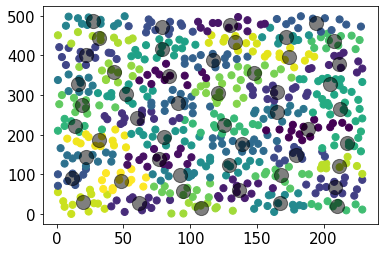

In [20]:
import time   
tic = time.perf_counter()
kmeanModel = KMeans(n_clusters, init='k-means++').fit(X_Y)
toc = time.perf_counter()
print(f"time = {toc-tic:0.4f} seconds")
kmeanModel.fit(X_Y)
y_kmeans = kmeanModel.predict(X_Y)
plt.scatter(X_Y[:,0], X_Y[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.rcParams.update({'font.size':15})
plt.show()

In [ ]:
def get_clustered_cities(num_clust, labels_array):
    return np.where(labels_array == num_clust)

In [ ]:
def plot_sys2_cities(sys2_cities):
    for k in K:
        plt.scatter(sys2_cities[k][:,0], sys2_cities[k][:,1])
        plt.show()

In [ ]:
sys2_cities = []
K = range(0,n_clusters) 
for k in K:
    sys2_cities.append([centers[k], X_Y[get_clustered_cities(k, kmeanModel.labels_)]])
    
for k in K:
    if (len(sys2_cities[k][1]) == 1):
        print("dirty cluster")
        

In [ ]:
def gen_sys2_sol(benchmark, sys2_cities):
    sol_table = []
    timet =[]
    os.system("rm -rf sys2clusters_" + str(benchmark))   
    for k in range(0, len(sys2_cities)):
        curr_center = sys2_cities[k][0]
        curr_clust = sys2_cities[k][1]
        curr_clust_size = len(curr_clust)
        curr_clust_file = [curr_clust_size]
        curr_clust_file.append(curr_clust)
        os.system("mkdir -p sys2clusters_" + str(benchmark))   
#        os.system("cd " + "sys2clusters_" + str(benchmark) +"/")
        curr_filename = str(benchmark) + "_c" + str(k) +".in"
        curr_logfile = str(benchmark) + "_c" + str(k) +".out"
#        print("sys2clusters_" + str(benchmark) + "/" + curr_filename)
        inF = open("sys2clusters_" + str(benchmark) + "/" + curr_filename,"w")
        inF.write(str(curr_clust_size))
        inF.write("\n")
        for i in curr_clust:
            inF.write(str(i[0]) + " " + str(i[1]))
            inF.write("\n")      
        inF.close()
        
#        outF = open("sys2clusters_" + str(benchmark) + "/" + curr_logfile,"w")
        
        for i in range(0,1):
#            outF.write("pass " + str(i+1) + "\n")
            tic = time.perf_counter()
            os.system("./ising " + "sys2clusters_" + str(benchmark) + "/" + curr_filename + " >> " + "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
            toc = time.perf_counter()
            timet.append(toc-tic)
        
#             print(f"time = {toc-tic:0.4f} seconds")
        dist_array =[]
        sol =[]
        with open("sys2clusters_" + str(benchmark) + "/" + curr_logfile,"r") as outFile:
            lines = outFile.readlines()
            for i in range(0,len(lines)):
                line = lines[i]
                if "dist" in line:
                    dist_array.append(line.strip().split()[1])
                    continue
            dist = min(dist_array)
            for i in range(0,len(lines)):
                line = lines[i]
                if str(dist) in line:
                    for j in range(i-curr_clust_size,i-1):
                        curr = lines[j].strip().split()
                        sol.append(curr)
                    break
            outFile.close()
                    
                    
        print("done with cluster" + str(k))            
        sol_table.append([curr_center, sol, dist])
    print("Ising time = " + str(max(timet)))   
    np.save("sys2clusters_" + str(benchmark) + "/sol_table" ,sol_table)
       

In [ ]:

gen_sys2_sol(x, sys2_cities)   



In [ ]:
from math import sin, cos, sqrt, atan2, radians
def compute_geo(p1,p2):
    R = 6373.0
    
    lat1 = radians(float(p1[0]))
    lon1 = radians(float(p1[1]))
    lat2 = radians(float(p2[0]))
    lon2 = radians(float(p2[1]))
    
    dlon = lon2 - lon1
    dlat = lat2 -lat1

    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a),sqrt(1-a))
    dist = R*c
    return dist

In [ ]:
test = np.load("sys2clusters_" + str(x) + "/sol_table.npy", allow_pickle=True)
test[0][2]

In [ ]:
coord_geo == False
if coord_geo == True:
#     test = np.load("sys2clusters_" + str(x) + "/sol_table.npy", allow_pickle=True)
    for i in range(len(test)):
        print(i)
        geo_dist = 0
        li = test[i][1]
        for idx,elem in enumerate(li):
            thiscity = elem
            nextcity = li[(idx+1)%len(li)]
            geo_dist += compute_geo(thiscity, nextcity)
        test[i][2] = geo_dist 
        print(geo_dist)
    np.save("sys2clusters_" + str(x) + "/sol_table" ,test)    


In [ ]:
# os.system("python generate_tsp_concorde.py --num_nodes " + str(n_clusters))    
# os.system("python split_train_val.py --num_nodes " + str(n_clusters))    
    

mport pdb; pdb.set_trace()     

In [ ]:
n_clusters


In [ ]:
num_samples = 10000
set_nodes_coord = np.random.random([num_samples, n_clusters, 2])
with open("tsp" + str(n_clusters) + "_pr1002.txt", "w") as f:
    solver = TSPSolver.from_data(centers[:,0], centers[:,1], norm="EUC_2D")  
    solution = solver.solve()
    f.write( " ".join( str(x)+str(" ")+str(y) for x,y in centers) )
    f.write( str(" ") + str('output') + str(" ") )
    f.write( str(" ").join( str(node_idx+1) for node_idx in solution.tour) )
    f.write( str(" ") + str(solution.tour[0]+1) + str(" ") )